# DSCI 100 Project Proposal: Optimizing Training in Professional Tennis
**Name | Student #**

Luke Pielak | 21805650 <br>
Walker Rout | 72504756 <br>
Gurman Gill | 34586586 <br>
Duncan McHugh | 58172966

## Introduction

#### Professional tennis players are all incredible athletes, and our group was curious to see what specific traits influenced their rankings. We are interested in performing a logistic regression analysis to determine whether a player is exceptional, or not. Whether or not a player is exceptional is determined by whether their peak elo rating is above 2100.

## Preliminary exploratory data analysis


In [1]:
# importing libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Reading the dataset into R

We will take a few steps to tidy the data:
1. Select only the variables that contain meaningful data for our preliminary analysis
2. Remove dates from Age column and convert to numeric type
3. Remove percentages from Favorite.Surface so that is purely categorical

In [2]:
# Selecting variables
print("Displaying initial dataset")
tennis <- read.csv("data/tennis.csv")
names(tennis)[1] <- "index"
tennis
print("Displaying relevant variables in dataset")
tennis <- tennis |>
    select(Age, Country, Plays, Backhand, Height, Peak.Elo.Rating)
tennis

[1] "Displaying initial dataset"


index,Age,Country,Plays,Wikipedia,Current.Rank,Best.Rank,Name,Backhand,Prize.Money,⋯,Facebook,Twitter,Nicknames,Grand.Slams,Davis.Cups,Web.Site,Team.Cups,Olympics,Weeks.at.No..1,Tour.Finals
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,,,⋯,,,,NA,NA,,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,,,,NA,NA,,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,,,,NA,NA,,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,,,,NA,NA,,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
496,26 (03-09-1993),Austria,Right-handed,Wikipedia,5 (5890),4 (06-11-2017),Dominic Thiem,One-handed,"$22,132,368 15th all-time leader in earnings",⋯,1.Dominic.Thiem,@ThiemDomi,Dominator,NA,NA,dominicthiem.tennis,NA,NA,NA,NA
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,,,⋯,,,,NA,NA,,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,,,⋯,,,,NA,NA,,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,,,,NA,NA,,NA,NA,NA,NA


[1] "Displaying relevant variables in dataset"


Age,Country,Plays,Backhand,Height,Peak.Elo.Rating
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
26 (25-04-1993),Brazil,Right-handed,,,
18 (22-12-2001),United Kingdom,Left-handed,Two-handed,,
32 (03-11-1987),Slovakia,Right-handed,Two-handed,185 cm,1886 (06-02-2012)
21 (29-05-1998),"Korea, Republic of",Right-handed,Two-handed,,
⋮,⋮,⋮,⋮,⋮,⋮
26 (03-09-1993),Austria,Right-handed,One-handed,185 cm,2211 (18-11-2019)
23 (14-03-1996),Netherlands,Left-handed,,,
24 (17-05-1995),Ukraine,,,,
22 (26-03-1997),Tunisia,Left-handed,Two-handed,,


In [3]:
# Remove rows with missing data
tennis <- tennis[!apply(tennis, 1, function(x) any(x=="")),]

# Remove the date from the "Age" column
tennis$Age <- sub("\\s*\\(.*\\)", "", tennis$Age)
# Convert the "Age" column to numeric data type
tennis$Age <- as.numeric(tennis$Age)

# Convert "Country" to a factor, then to a numeric representation
tennis$Country <- as.numeric(factor(tennis$Country))

# Convert "Plays" to a factor, then to a numeric representation
tennis$Plays <- as.numeric(factor(tennis$Plays))
                        
# Convert "Backhand" to a factor, then to a numeric representation
tennis$Backhand <- as.numeric(factor(tennis$Backhand))

# Remove the cm from the "Height" column
tennis$Height <- sub(" cm", "", tennis$Height)
# Convert the "Height" column to numeric data type
tennis$Height <- as.numeric(tennis$Height)
                        
# Remove the date from the "Peak.Elo.Rating" column
tennis$Peak.Elo.Rating <- sub("\\s*\\(.*\\)", "", tennis$Peak.Elo.Rating)
# Convert the "Peak.Elo.Rating" column to numeric data type
tennis$Peak.Elo.Rating <- as.numeric(tennis$Peak.Elo.Rating)

# Create the exceptional column
tennis <- tennis |>
    mutate(Exceptional = ifelse(Peak.Elo.Rating < 2100, "not-exceptional", "exceptional"))
# The following line is required for actual regression, but it is easier to visualize exceptionalism in qualitative form
# For the sake of actual regression, convert "Exceptional" to a factor, then to a numeric representation, where it is **0 or 1**
#tennis$Exceptional <- as.numeric(factor(tennis$Exceptional)) - 1

tennis

,Age,Country,Plays,Backhand,Height,Peak.Elo.Rating,Exceptional
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,32,30,2,2,185,1886,not-exceptional
5,27,2,2,2,193,2037,not-exceptional
16,31,1,2,2,198,2329,exceptional
21,33,33,2,2,190,2004,not-exceptional
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
461,35,15,2,2,183,2124,exceptional
468,29,8,2,2,196,2269,exceptional
474,34,11,2,2,183,2098,not-exceptional
497,26,3,2,1,185,2211,exceptional


In [4]:
# wrangle data to report the number of observations for each class
tennis_summary <- tennis |>
  group_by(Exceptional) |>
  summarize(Observations = n())

tennis_summary

Exceptional,Observations
<chr>,<int>
exceptional,27
not-exceptional,85


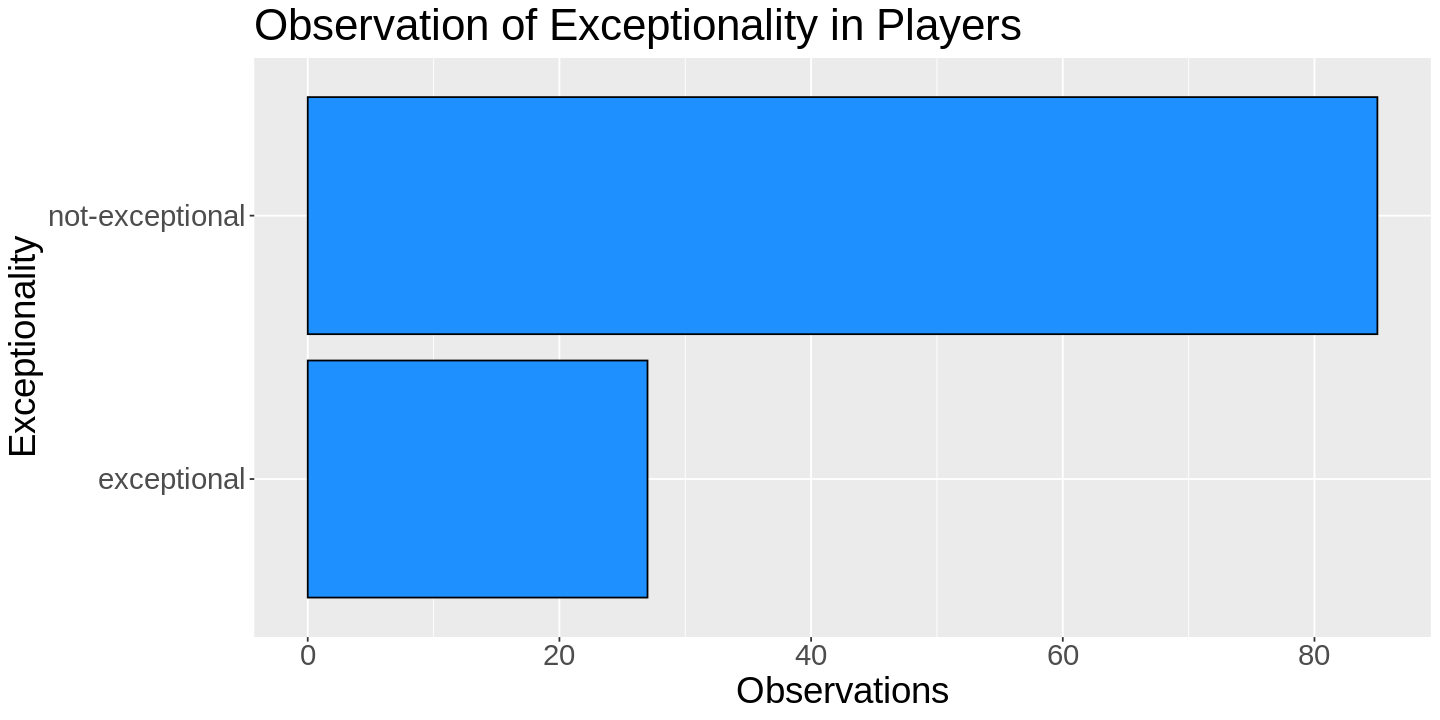

In [5]:
# vizualizing the distribution of classes
options(repr.plot.width = 12, repr.plot.height = 6)

tennis_plot <- tennis_summary |> 
    ggplot(aes(x = Exceptional, y = Observations)) +
        geom_bar(stat = "identity", position = "dodge", color = "black", fill = "dodgerblue") +
        labs(x = "Exceptionality", y = "Observations", title = "Observation of Exceptionality in Players") +
        theme(text = element_text(size = 22)) +
        coord_flip()

tennis_plot

> Note - there is a lower proportion of non-exceptional athletes in the dataset

## Methods

### Explain how you will conduct either your data analysis and which variables/columns you will use. 
> Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Our group is planning to perform binary logistic regression in order to predict whether or not a player is 'exceptional'. According to https://www.ultimatetennisstatistics.com/peakEloRatings, the top ~200 players all have a peak elo of above 2100. Consequently, our group will partition players into the binary categories of 'exceptional' and 'not-exceptional', with all 'exceptional' players having a peak elo of above 2100, and all 'not-exceptional' players having a peak elo under 2100. The relevant variables to the regression analysis will first be turned into factors, and then represented by their numeric levels, as logistic regression involves the use of quantitative inputs only. Favorite surface was initially going to be included as an independent variables, but due to a prevalence of missing values, it was removed from the list.

Independent Variables: Age (the age of the player), Country (where the player is from -> factored), Plays (whether the player is left or right handed -> factor), Backhand (whether the player prefers to use two hands or one hands for the backhand serve), and Height (the height of the player).

Dependent Variable: Exceptional (whether a player is 'exceptional' or 'not-exceptional' -> factored -> must be 0 or 1).

### Describe at least one way that you will visualize the results
We could create a scatter plot with the prediction percentages of each player, and visualize their fit along the logistic curve used in the regression. Not only that, but it would also be possible to create a bar chart to represent the number of occurrences of exceptional players within this batch of data.

## Expected Outcomes and Significance

### What do you expect to find?
- We expect to find clear evidence that certain player attributes yield success on specific playing surfaces. For example, height may be a primary attribute that determines a players preferred surface as taller players may do better on grassy surfaces which tend to favor big serves whereas shorter players may succeed on faster surfaces, such as hard courts. 

### What impact could such findings have?
- Such findings could influence how players train, how they are selected for specialized programs and how they select which tournaments and matches to compete in. 
- Coaches could use the insights from the results of this study to build better programs that adhere to each player's strengths and weaknesses, focusing on developing their skills based on their court preferences or a court they’d more likely succeed in. 

### What future questions could this lead to?
- How do a player’s strengths influence their winnings total?
- Given the financial incentives tied to tournaments on particular surfaces, should players tailor their training to specialize?
- The insights from this analysis could also inform decisions around tournament planning and scheduling. For example, if a tournament director knows that a large number of players with a one-handed backhand prefer clay courts, they may choose to schedule more clay court events to attract those players and increase the competitiveness of the tournament.
